<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/Support-Vector-Machines/Support_Vector_Machines_(SVMs)_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support vector machines (SVMs)

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

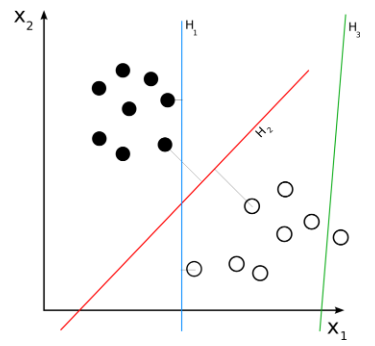

The main goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH) and it can be done in the following two steps:

*    First, SVM will generate hyperplanes iteratively that segregates the classes in best way.
*    Then, it will choose the hyperplane that separates the classes correctly.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_blobs

Once the moons dataset had been created, I used matplotlib to plot it on a graph

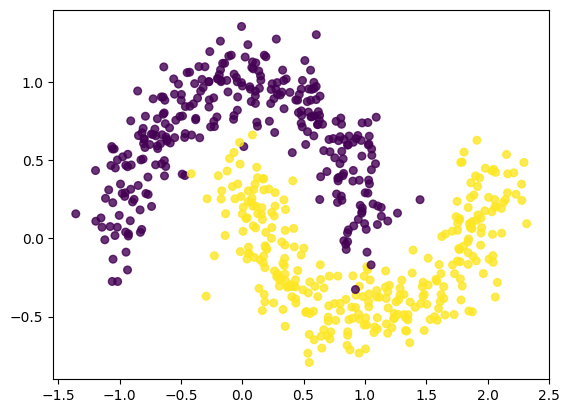

In [ ]:
# creating a dataset with no linearly separable data
X, y = make_moons(n_samples=600, noise=0.15)
# X, y = make_circles(n_samples=600, noise=0.15, factor=.4)
# X, y = make_blobs(n_samples=600, n_features=2, centers=2, cluster_std=.8, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, alpha=0.8)
plt.show()

I then defined the independent variables. The first thing I did was to place the label in a variable called target, and then drop the label from the dataframe. I then placed the target in y, which is a variable I defined. The rest of the data, df, was then placed in X, which was another variable I defined. X is the independent variable while y is dependent.

I then used sklearn’s train_test_split to split the X and y variables up for training and validating:-

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420, 2), (180, 2), (420,), (180,))

Once the training and validating datasets had been created, I defined the model. Since this is an exercise of SVM’s, I was obliged to use SVC and tune its parameters to achieve the best performance. In previous post, I used the *linear* kernel to achieve the best results in the bill authentication dataset, but in this post I have had to use a kernel that is nonlinear in an attempt to achieve the best accuracy. In the end I settled for the ‘**rbf**’ kernel. The **radial basis kernel**, or **rbf**, is a kernel function that is used in machine learning to find a nonlinear classifier or regression line.

The rbf kernel function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n, and then find the dot product in higher dimensional efficiently. The main idea to use this kernel is: A linear classifier or regression curve in higher dimensions becomes a Non-linear classifier or regression curve in lower dimensions.

###Tunable parameter C
The C here is called the tunable parameter. **Higher is the C** parameter, the **margin will be smaller**, and **lower the C** parameter, the **margin is larger**. Why is this important?

* For the larger value of C, the margin is smaller and when applying it to the test data we might have more errors (think about this!!) and this can cause overfit
* For the smaller value of C, it tries to get a larger margin at the cost of more misclassifications. This can lead to underfitting.
* So, this C parameter needs to be tuned to an optimal value such that we have the right fit on the data.

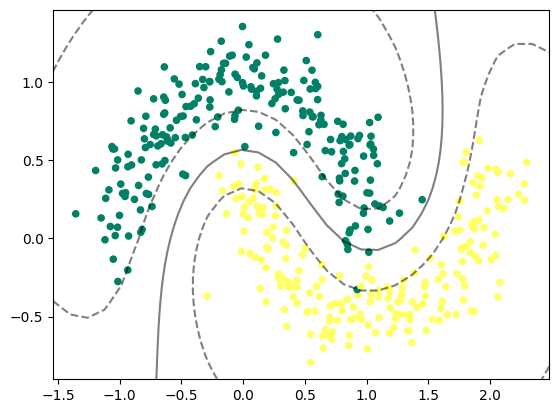

In [ ]:
# SVC: Support vector classifier
from sklearn.svm import SVC
# Parameter C : float, default=1.0
# Regularization parameter. The strength of the regularization is
# inversely proportional to C. Must be strictly positive.
# The penalty is a squared l2 penalty.
#model = SVC(kernel='linear', C=10)
#model = SVC(kernel='sigmoid', C=1)
#model = SVC(kernel='poly', degree=3, C=10)
model = SVC(kernel='rbf', C=1)
#model = SVC(kernel='rbf', C=10)
#model = SVC(kernel='rbf', C=1000)
model.fit(X_train, y_train)

def decision_function(model, ax=None, plot_support=True):
    if ax is None:
       ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
       ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='summer')
decision_function(model);
plt.show()

We can observe from the above output that an SVM classifier fit to the data
with margins i.e. dashed lines and support vectors, the pivotal elements of
this fit, touching the dashed line. These support vector points are stored
in the `support_vectors_` attribute of the classifier

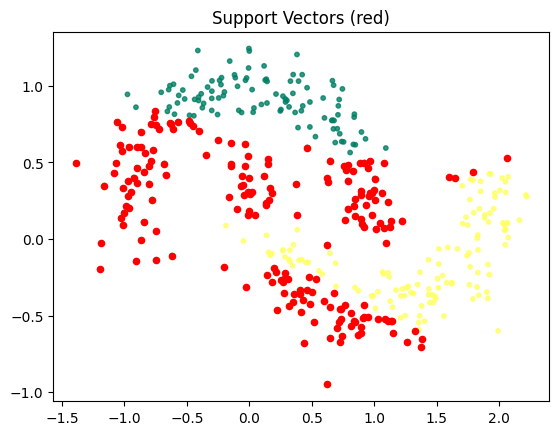

In [ ]:
#print('support vector points:\n', model.support_vectors_)
X_sv = model.support_vectors_
#plt.scatter(X_sv[:, 0], X_sv[:, 1], s=30, c='red')
#plt.plot(X_train[:, 0], X_train[:, 1], 'g.', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, alpha=0.8, cmap='summer')
plt.scatter(X_sv[:, 0], X_sv[:, 1], s=20, c='red')
plt.title('Support Vectors (red)')
plt.show()

In [ ]:
print(model.score(X_train, y_train))

0.819047619047619


After I defined the model, I predicted on the validation set and achieved 100% accuracy (if rbf kernel!)

In [ ]:
print('Model accuracy: ', model.score(X_test, y_test))

Model accuracy:  0.7555555555555555


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
print('confusion Matrix:\n', confusion_matrix(y_pred, y_test))

confusion Matrix:
 [[87  1]
 [14 78]]


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       100
           1       0.90      0.89      0.89        80

    accuracy                           0.91       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



#Exercícios

1.   Com o banco de dados inicial (`make_moons`), modifique o kernel do SVC (Support vector classifier) para linear, polinomial e sigmoid com o valor do parâmetro de regularização `C` fixo e compare e comente os resultados.
2.   Altere o valor do parâmetro de regularização `C` para 5 valores onde $0.1<C<100$. compare e comente os resultados.
3. Modifique o valor do parâmetro `noise` do banco de dados `make_moons` comente os resultados (utilizando kernel '`rbf`').
4. Utilize a biblioteca `make_cycles` para criar um novo banco de dados com parâmetros `n_samples=500, noise=0.15, factor=.4`. Refaça os exercícios anteriores e comente os resultados.
5. Modifique os parâmetros `noise=0.15, factor=.4`, um de cada vez, com valores não muito diferentes destes. Comente os resultados.
6. Quais as situações obteve-se melhores acurácias do algoritmo?




# Referências

[1] https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_support_vector_machine.htm

[2] https://medium.com/mlearning-ai/how-to-create-a-two-moon-dataset-and-make-predictions-on-it-dcc090c829af

[3] https://medium.com/mlearning-ai/how-to-use-the-support-vector-machine-svm-as-a-classifier-e3b597d1b125

##Contribuições dos alunos

Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br>

Segue o comparativo entre angulo, accurácia de treino e teste, e valor de C, para o kernel poly da SVC

São 3 células

celula 1 - Essa célula demora uns 14min pra rodar. As SVM de poly com grau 10 demoram para treinar, e está sendo treinado 100 de cada angulo (salvos no vetor "deg")

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br> 05/2024

from sklearn.svm import SVC
from sklearn.datasets import make_moons

# creating a dataset with no linearly separable data
X, y = make_moons(n_samples=600, noise=0.15)
# X, y = make_circles(n_samples=600, noise=0.15, factor=.4)
# X, y = make_blobs(n_samples=600, n_features=2, centers=2, cluster_std=.8, shuffle=True, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=30, alpha=0.8)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

x5 = np.linspace(0.1,100,100)

resp = []
deg = np.array([2, 5, 7, 10])

print('SVC - Poli')


for b in range(0,len(deg)):
  exec(f"""acc_train{b} = []""")
  exec(f"""acc_test{b} = []""")

  for i in range(0,len(x5)):
    #model = SVC(kernel='linear', C=x5[i])
    #model = SVC(kernel='rbf', C=x5[i])
    model = SVC(kernel='poly', degree=deg[b], C=x5[i])
    #model = SVC(kernel='linear', C=x5[i])
    # model = SVC(kernel='sigmoid',C=x5[i])

    model.fit(X_train, y_train)
    exec(f'acc_train{b} = np.append(acc_train{b},model.score(X_train, y_train))')

    exec(f'acc_test{b} = np.append(acc_test{b},model.score(X_test, y_test))')

  exec(f"""resp = np.append(resp, [deg[b], x5[np.argmax(acc_train{b})], acc_train{b}[np.argmax(acc_train{b})], x5[np.argmax(acc_test{b})], acc_test{b}[np.argmax(acc_test{b})] ] ) """)

  exec(f"""print("Deg = %.2f, -> treinamento: Melhor C =  %.2f, Acc_tr = %.4f" % (deg[b], x5[np.argmax(acc_train{b})], acc_train{b}[np.argmax(acc_train{b})])) """)

  exec(f"""print("           |-> teste : Melhor C = %.2f, Acc_teste = %.4f" % (x5[np.argmax(acc_test{b})], acc_test{b}[np.argmax(acc_test{b})])) """)


resp = resp.reshape(-1,5)


SVC - Poli
Deg = 2.00, -> treinamento: Melhor C =  0.10, Acc_tr = 0.7905
           |-> teste : Melhor C = 1.11, Acc_teste = 0.7278
Deg = 5.00, -> treinamento: Melhor C =  1.11, Acc_tr = 0.8976
           |-> teste : Melhor C = 1.11, Acc_teste = 0.8778
Deg = 7.00, -> treinamento: Melhor C =  18.26, Acc_tr = 0.8929
           |-> teste : Melhor C = 17.25, Acc_teste = 0.8667
Deg = 10.00, -> treinamento: Melhor C =  38.45, Acc_tr = 0.7786
           |-> teste : Melhor C = 38.45, Acc_teste = 0.7611


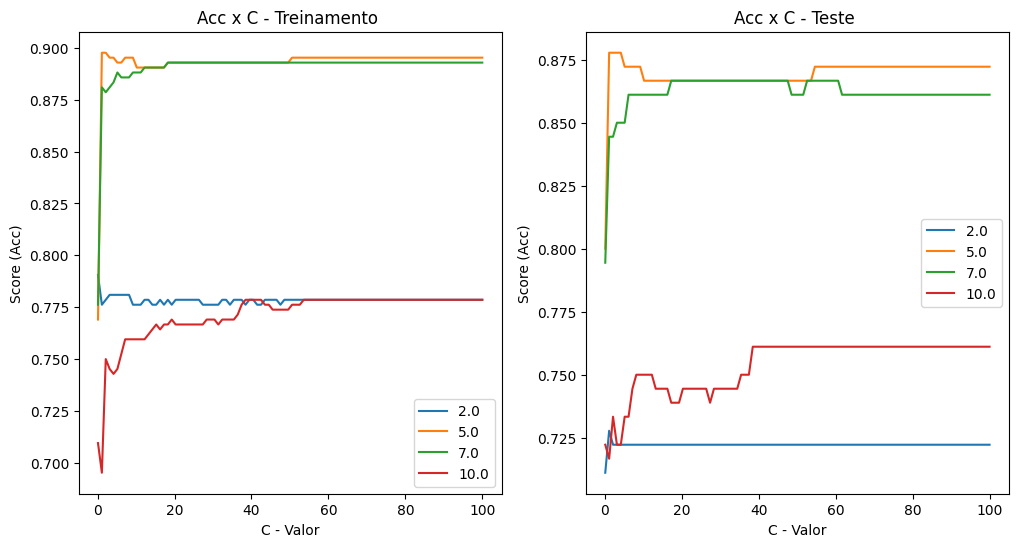

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br> 05/2024

# celula 2 - gera plot dos comparativos
# --------------------
#resp -> angulo, C_train, acc_train, C_test, acc_test
#gera figura comparativo da accuracia x c

fig, axes = plt.subplots(1,2,figsize=(12,6))

for b in range(0,len(deg)):
  exec(f"""axes[0].plot(x5,acc_train{b})""")
  exec(f"""axes[1].plot(x5,acc_test{b})""")

axes[0].set_title('Acc x C - Treinamento ')
axes[0].legend(resp[:,0])
axes[1].legend(resp[:,0])
axes[1].set_title('Acc x C - Teste ')
axes[0].set_xlabel('C - Valor')
axes[0].set_ylabel('Score (Acc)')
axes[1].set_xlabel('C - Valor')
axes[1].set_ylabel('Score (Acc)')
# axes[0].set_xlim([0, 5])
# axes[1].set_ylim([0, 5])
fig.show()

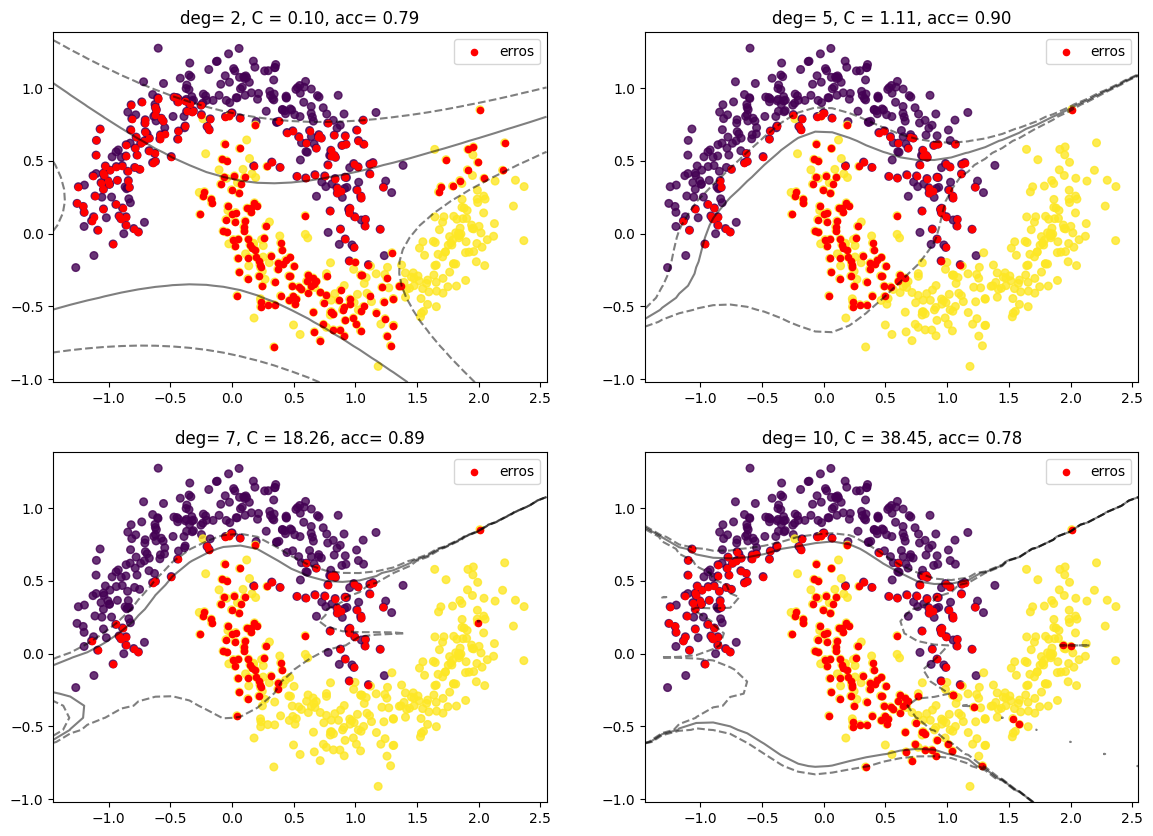

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br> 05/2024

# celular 3 - plota os melhores resultados (maior acurácia de treino) de cada grau
# -------------------
#gera figuras das SVM nos graus encontrados

fig, axes = plt.subplots(2,2,figsize=(14,10))
k = 0
l = 0

for i in range(0,len(deg)):
  model = SVC(kernel='poly', degree=int(resp[i,0]), C=resp[i,1])
  model.fit(X_train, y_train)

  axes[k][l].scatter(X[:, 0], X[:, 1], c=y, s=30, alpha=0.8,zorder=6)
  xlim = axes[k][l].get_xlim()
  ylim = axes[k][l].get_ylim()
  x2 = np.linspace(xlim[0], xlim[1], 30)
  y2 = np.linspace(ylim[0], ylim[1], 30)
  Y2, X2 = np.meshgrid(y2, x2)
  xy = np.vstack([X2.ravel(), Y2.ravel()]).T
  P = model.decision_function(xy).reshape(X2.shape)
  axes[k][l].contour(X2, Y2, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'],zorder=12)

  axes[k][l].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
  axes[k][l].set_title(f"""deg= {int(resp[i,0])}, C = {resp[i,1]:.2f}, acc= {resp[i,2]:.2f}""")
  X_sv = model.support_vectors_
  axes[k][l].scatter(X_sv[:, 0], X_sv[:, 1], s=20, c='red',label="erros",zorder=10)
  axes[k][l].legend()
  if l < 1:
    l = l + 1
  else:
    k = k + 1
    l = 0

fig.show()

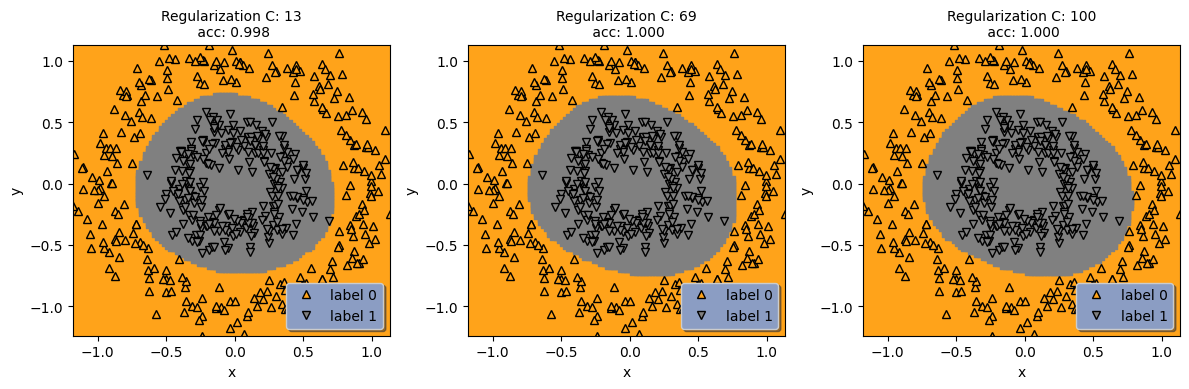

In [ ]:
# Contribuição de Marcelo Henrique Jeronymo <marcelo.henrique@uel.br> 05/2024
#
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
from matplotlib import pyplot as plt

c_vals = [13, 69, 100]

fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(12, 4))
i = 0
colors = ("#ffa31a", "#808080", "#292929", "#1b1b1b")
x, y = make_circles(500, noise=0.1, factor=0.4, random_state=42069)
for j, c_val in enumerate(c_vals):

    model = SVC(kernel="rbf", C=c_val)
    model.fit(x, y)

    y_pred = model.predict(x)

    x_plot_voronoi = np.array([(x_, y_) for x_ in np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
      for y_ in np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)])
    y_plot_voronoi = model.predict(x_plot_voronoi)

    for l in range(2):
        ax[j].scatter(*x_plot_voronoi[y_plot_voronoi==l].T, color=colors[l], marker='s')
        ax[j].plot(*x[y==l].T, color=colors[l], ls="None", marker='^' if l==0 else 'v',markeredgecolor="#000000", label=f"label {l}")

    ax[j].set_xlabel('x')
    ax[j].set_ylabel('y')
    ax[j].set_xlim([np.min(x[:, 0]), np.max(x[:, 0])])
    ax[j].set_ylim([np.min(x[:, 1]), np.max(x[:, 1])])
    ax[j].legend(loc="lower right", facecolor="#8b9dc3", shadow=True)
    ax[j].set_title(f"Regularization C: {c_val}\n acc: {accuracy_score(y, model.predict(x)):.3f}", fontsize="medium")

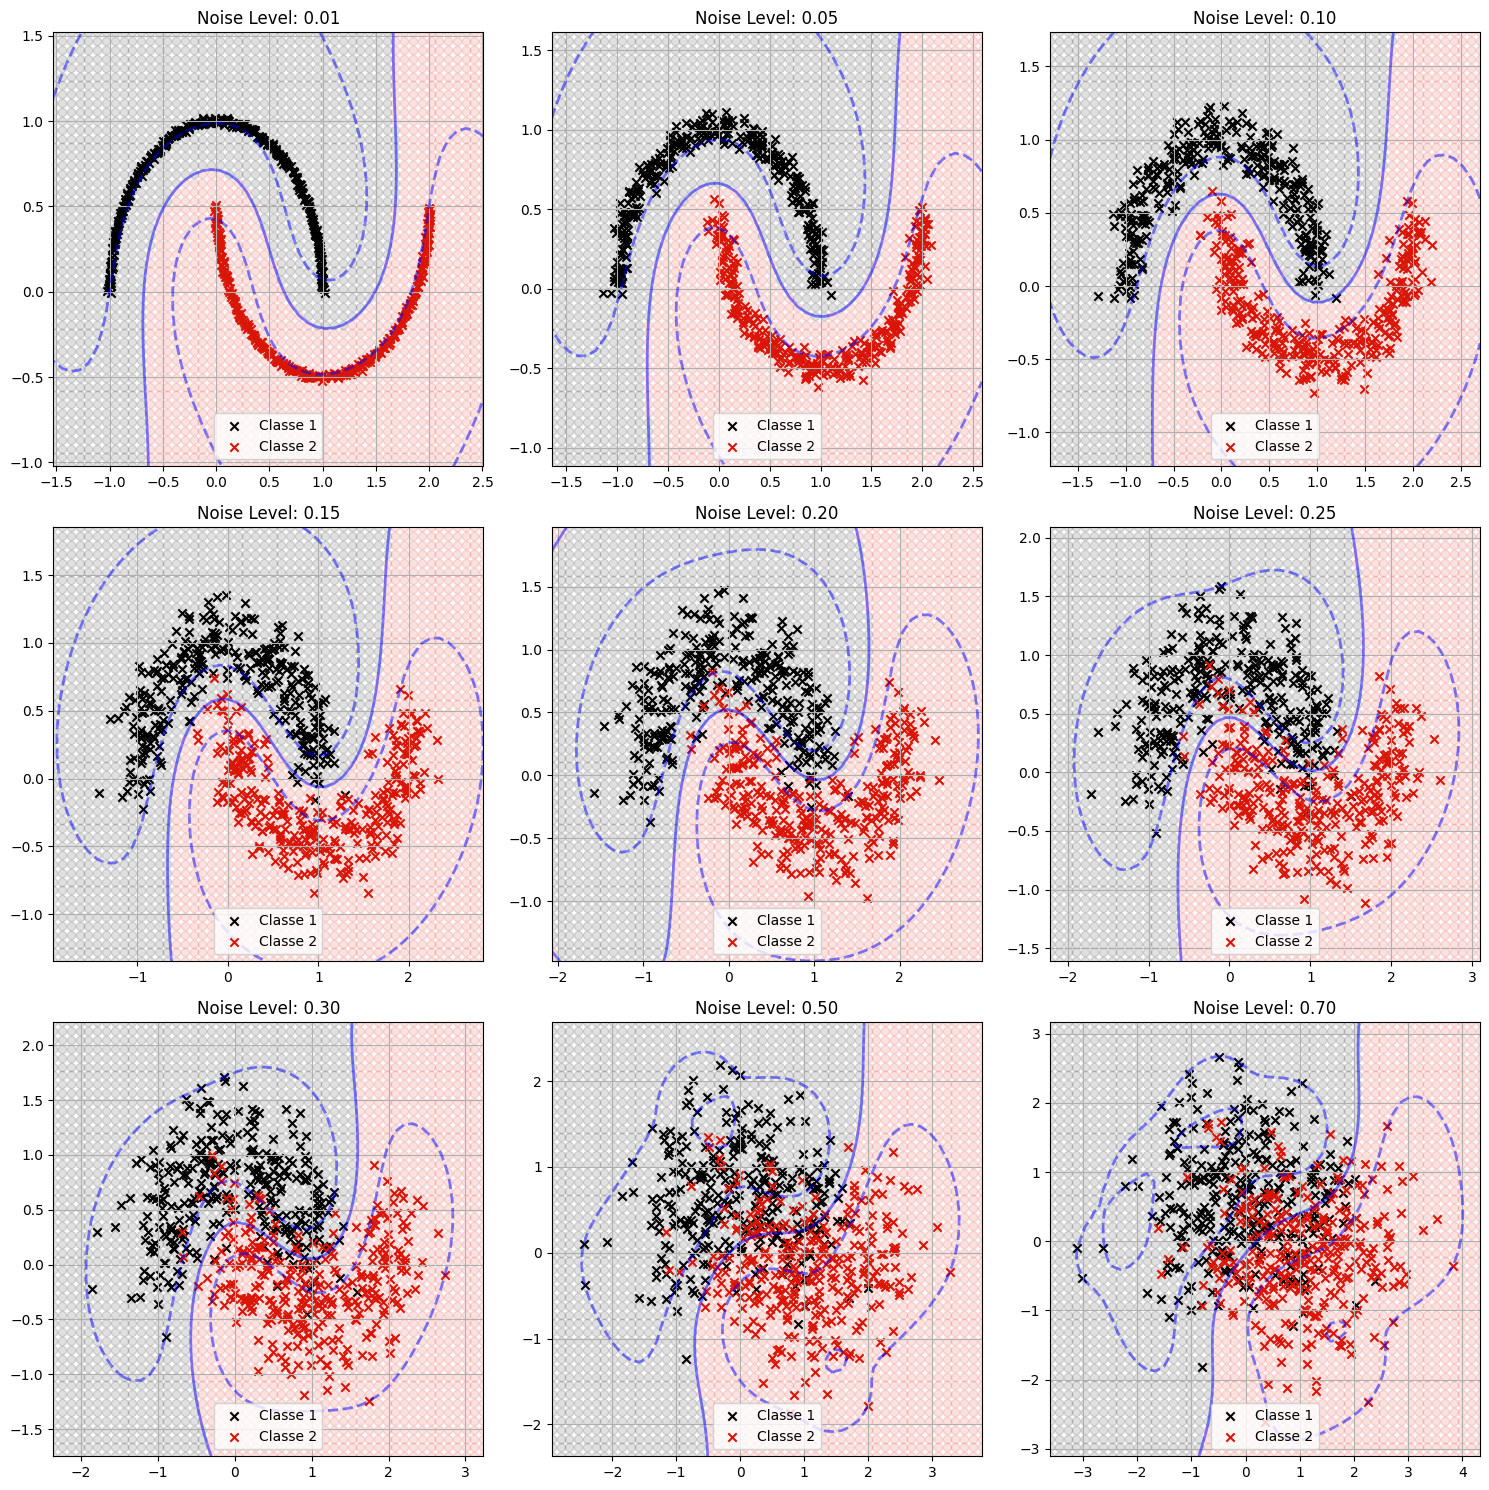

In [ ]:
# Contribuição de Gabriel Delongui Polvani <gabriel.polvani@uel.br> 05/2024
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

noise_levels = [0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.50, 0.70]

# Classifier plot:
fig2, ax = plt.subplots(ncols=3, nrows=3, layout='tight', figsize=(15,15))
ax = ax.ravel()

for i, n in enumerate(noise_levels):

    # Gerando o Dataset:
    X, y = make_moons(n_samples=600, noise=n, random_state=10)

    # Declarando as variáveis para os plots das regiões de decisão:
    X1r, X2r = np.meshgrid(np.linspace(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 50),
                       np.linspace(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 50))
    x1r, x2r = np.ravel(X1r), np.ravel(X2r)
    pr = np.vstack([x1r, x2r]).T

    model = SVC(kernel='rbf')
    model.fit(X, y)
    rp = model.predict(pr)

    yr = model.decision_function(pr).reshape(X1r.shape)

    ax[i].contour(X1r, X2r, yr, colors='#0000FF', linewidths=2, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot das regiões de decisão (v1):
    ax[i].scatter(*pr[rp==0].T, color='#000000', alpha=0.12)
    ax[i].scatter(*pr[rp==1].T, color='#D91507', alpha=0.12)

    ax[i].set_title(f'Noise Level: {n:.2f}'), ax[i].grid()
    ax[i].scatter(*X[y==0].T, color='#000000', label='Classe 1', marker='x')
    ax[i].scatter(*X[y==1].T, color='#D91507', label='Classe 2', marker='x')
    ax[i].legend()